In [31]:
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.manifold import MDS
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture


In [32]:
df = pd.read_csv('master.csv')

df.drop(["country-year","HDI for year"],axis=1,inplace=True)
df.rename(columns={' gdp_for_year ($) ':"gdp_year",'gdp_per_capita ($)':'gdp_per_capita'},inplace=True)

In [33]:
def comas(x):
   return x.replace(',','')
df["gdp_year"]=df["gdp_year"].map(comas)
df["gdp_year"]=df["gdp_year"].astype('int64')

In [34]:
df.head(15)

,country,year,sex,age,suicides_no,population,suicides/100k pop,gdp_year,gdp_per_capita,generation
0,Albania,1987,male,15-24 years,21,312900,6.71,2156624900,796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,2156624900,796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,2156624900,796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,2156624900,796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,2156624900,796,Boomers
5,Albania,1987,female,75+ years,1,35600,2.81,2156624900,796,G.I. Generation
6,Albania,1987,female,35-54 years,6,278800,2.15,2156624900,796,Silent
7,Albania,1987,female,25-34 years,4,257200,1.56,2156624900,796,Boomers
8,Albania,1987,male,55-74 years,1,137500,0.73,2156624900,796,G.I. Generation
9,Albania,1987,female,5-14 years,0,311000,0.00,2156624900,796,Generation X


In [35]:
df=df[["year","population","suicides/100k pop","gdp_per_capita"]].groupby(["year"]).agg(['mean','median'])
df.head()

population           suicides/100k pop        gdp_per_capita        
              mean    median              mean median           mean  median
year                                                                        
1985  1.751042e+06  291300.0         11.826198  4.740    6091.229167  4429.5
1986  1.788038e+06  339100.0         11.423333  5.565    7126.104167  4530.0
1987  1.689861e+06  322000.0         11.644213  5.670    8712.592593  5556.0
1988  1.792678e+06  347850.0         12.709405  6.990    9983.857143  6693.0
1989  1.963965e+06  374500.0         12.879071  6.945    9725.038462  6326.5

In [36]:
columns=[]
for i in range(len(df.columns.levels[0])):
    for j in range(len(df.columns.levels[1])):
        columns.append("{}_{}".format(df.columns.levels[0][i],df.columns.levels[1][j]))

df.columns=columns
df.reset_index(inplace=True)
df.head()

,year,population_mean,population_median,suicides/100k pop_mean,suicides/100k pop_median,gdp_per_capita_mean,gdp_per_capita_median
0,1985,1.751042e+06,291300.0,11.826198,4.740,6091.229167,4429.5
1,1986,1.788038e+06,339100.0,11.423333,5.565,7126.104167,4530.0
2,1987,1.689861e+06,322000.0,11.644213,5.670,8712.592593,5556.0
3,1988,1.792678e+06,347850.0,12.709405,6.990,9983.857143,6693.0
4,1989,1.963965e+06,374500.0,12.879071,6.945,9725.038462,6326.5


Escalando las variables y Normalizando

In [37]:
X=df.drop(columns=["year"])
sc = StandardScaler()
mm = MinMaxScaler()
sc.fit(X)
mm.fit(X)

MinMaxScaler(copy=True, feature_range=(0, 1))

In [38]:
Xs = pd.DataFrame(sc.transform(X),columns=X.columns)
Xmm = pd.DataFrame(mm.transform(X),columns=X.columns)

VAMOS A HACER PCA PARA TRATAR DE DETERMINAR CUANTOS GRUPOS SE PODRIAN ENCONTRAR

In [39]:
pca = PCA(n_components=2)
pca.fit(Xs)
Xp = pd.DataFrame(pca.transform(Xs),columns=['p1','p2'])

In [40]:
pca.explained_variance_ratio_.cumsum()

array([0.49446231, 0.75776806])

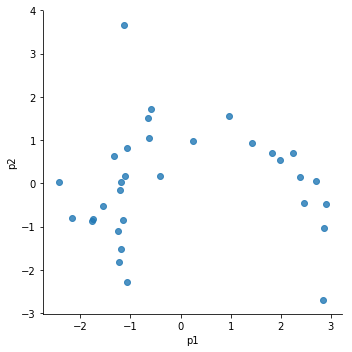

In [41]:
sns.lmplot(data=Xp,x='p1',y='p2',fit_reg=False)

In [42]:
mds=MDS(n_components=2)

In [43]:
Xm=pd.DataFrame(mds.fit_transform(Xmm),columns=['d1','d2'])

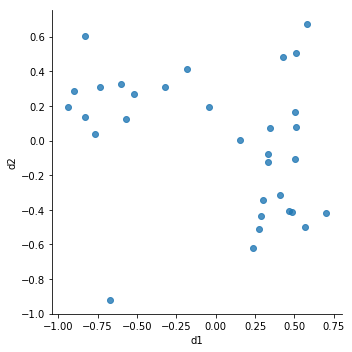

In [44]:
sns.lmplot(data=Xm,x='d1',y='d2',fit_reg=False)